# Classification of Migranine

## Chapter 1: Importing Libraries and Loading the Dataset

In this section, important libraries and dataset will be loaded. In addition to, Understanding of the dataset.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import seaborn as sns

In [2]:
#loading the dataset
migraine = pd.read_csv('data.csv')
#checking the head of the dataset
migraine.head()

,Age,Duration,Frequency,Location,Character,Intensity,Nausea,Vomit,Phonophobia,Photophobia,Visual,Sensory,Dysphasia,Dysarthria,Vertigo,Tinnitus,Hypoacusis,Diplopia,Defect,Ataxia,Conscience,Paresthesia,DPF,Type
0,30,1,5,1,1,2,1,0,1,1,1,2,0,0,0,0,0,0,0,0,0,0,0,Typical aura with migraine
1,50,3,5,1,1,3,1,1,1,1,2,1,0,0,1,0,0,0,0,0,0,0,0,Typical aura with migraine
2,53,2,1,1,1,2,1,1,1,1,2,0,0,0,0,0,0,0,0,0,0,0,0,Typical aura with migraine
3,45,3,5,1,1,3,1,0,1,1,2,2,0,0,1,0,0,0,0,0,0,0,0,Typical aura with migraine
4,53,1,1,1,1,2,1,0,1,1,4,0,0,0,0,0,0,0,0,0,0,0,1,Typical aura with migraine


In [3]:
#checking the shape
print(f"The dataset contains {migraine.shape[0]} rows and {migraine.shape[1]} features")

The dataset contains 400 rows and 24 features


In [4]:
#checking the null values
print(f'Null values present in the dataset for each features \n{migraine.isnull().sum()}')

Null values present in the dataset for each features 
Age            0
Duration       0
Frequency      0
Location       0
Character      0
Intensity      0
Nausea         0
Vomit          0
Phonophobia    0
Photophobia    0
Visual         0
Sensory        0
Dysphasia      0
Dysarthria     0
Vertigo        0
Tinnitus       0
Hypoacusis     0
Diplopia       0
Defect         0
Ataxia         0
Conscience     0
Paresthesia    0
DPF            0
Type           0
dtype: int64


In [5]:
#checking all the names of the columns
migraine.columns

Index(['Age', 'Duration', 'Frequency', 'Location', 'Character', 'Intensity',
       'Nausea', 'Vomit', 'Phonophobia', 'Photophobia', 'Visual', 'Sensory',
       'Dysphasia', 'Dysarthria', 'Vertigo', 'Tinnitus', 'Hypoacusis',
       'Diplopia', 'Defect', 'Ataxia', 'Conscience', 'Paresthesia', 'DPF',
       'Type'],
      dtype='object')

In [6]:
#checking the info 
migraine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 24 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Age          400 non-null    int64 
 1   Duration     400 non-null    int64 
 2   Frequency    400 non-null    int64 
 3   Location     400 non-null    int64 
 4   Character    400 non-null    int64 
 5   Intensity    400 non-null    int64 
 6   Nausea       400 non-null    int64 
 7   Vomit        400 non-null    int64 
 8   Phonophobia  400 non-null    int64 
 9   Photophobia  400 non-null    int64 
 10  Visual       400 non-null    int64 
 11  Sensory      400 non-null    int64 
 12  Dysphasia    400 non-null    int64 
 13  Dysarthria   400 non-null    int64 
 14  Vertigo      400 non-null    int64 
 15  Tinnitus     400 non-null    int64 
 16  Hypoacusis   400 non-null    int64 
 17  Diplopia     400 non-null    int64 
 18  Defect       400 non-null    int64 
 19  Ataxia       400 non-null    

In [7]:
migraine.groupby('Type').size()

Type
Basilar-type aura                 18
Familial hemiplegic migraine      24
Migraine without aura             60
Other                             17
Sporadic hemiplegic migraine      14
Typical aura with migraine       247
Typical aura without migraine     20
dtype: int64

## Chapter 2: Exploratory Data Analysis

In [8]:
#checking for the unique value present in each feature
for feature in migraine.columns:
    print(f"Unique values in {feature}:{migraine[feature].unique()}")

Unique values in Age:[30 50 53 45 49 27 24 23 48 51 34 20 40 56 44 46 25 38 35 17 36 31 67 22
 68 43 41 37 26 54 16 33 70 28 29 69 21 64 32 52 47 39 57 58 42 77 18 59
 55 19 15]
Unique values in Duration:[1 3 2]
Unique values in Frequency:[5 1 2 8 7 6 4 3]
Unique values in Location:[1 2 0]
Unique values in Character:[1 2 0]
Unique values in Intensity:[2 3 1 0]
Unique values in Nausea:[1 0]
Unique values in Vomit:[0 1]
Unique values in Phonophobia:[1 0]
Unique values in Photophobia:[1 0]
Unique values in Visual:[1 2 4 0 3]
Unique values in Sensory:[2 1 0]
Unique values in Dysphasia:[0 1]
Unique values in Dysarthria:[0 1]
Unique values in Vertigo:[0 1]
Unique values in Tinnitus:[0 1]
Unique values in Hypoacusis:[0 1]
Unique values in Diplopia:[0 1]
Unique values in Defect:[0 1]
Unique values in Ataxia:[0]
Unique values in Conscience:[0 1]
Unique values in Paresthesia:[0 1]
Unique values in DPF:[0 1]
Unique values in Type:['Typical aura with migraine' 'Migraine without aura' 'Basilar-type

c:\Users\Me\anaconda3\Lib\site-packages\seaborn\categorical.py:1794: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\Me\anaconda3\Lib\site-packages\seaborn\categorical.py:1794: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\Me\anaconda3\Lib\site-packages\seaborn\categorical.py:1794: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\Me\anaconda3\Lib\site-packages\seaborn\categorical.py:1794: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating

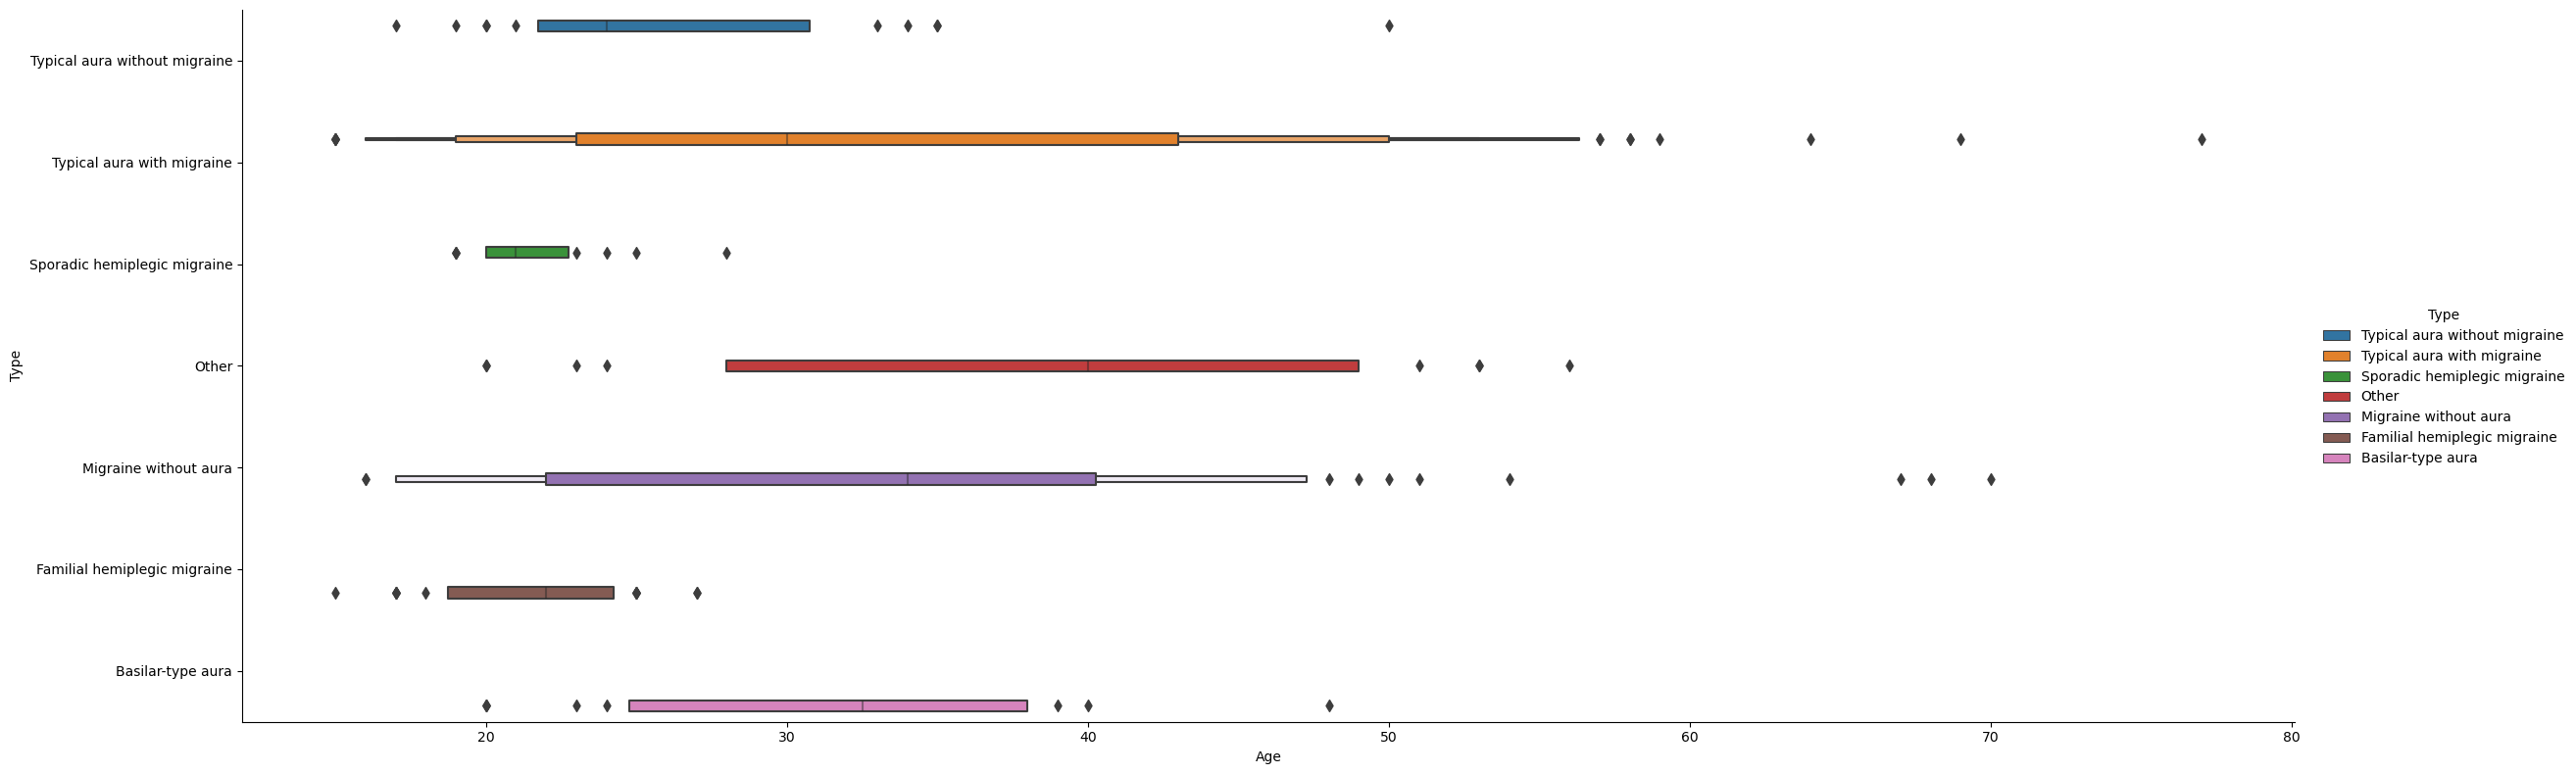

In [9]:
#checking for the outliers
sns.catplot(y='Type', x='Age', hue='Type',data = migraine.sort_values("Type", ascending=False), kind = 'boxen',height =8, aspect=3)

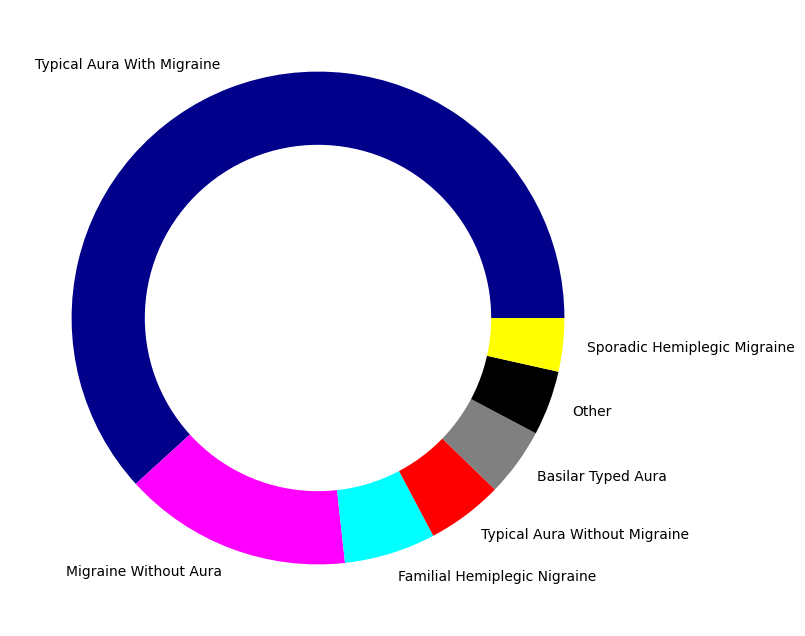

In [10]:
plt.figure(figsize = (10,8))
circle = plt.Circle((0,0),0.7,color='white')
plt.pie(migraine.Type.value_counts(),
        labels = ['Typical Aura With Migraine', 'Migraine Without Aura', 'Familial Hemiplegic Nigraine',
        'Typical Aura Without Migraine', 'Basilar Typed Aura','Other', 'Sporadic Hemiplegic Migraine'], 
        colors=['darkblue', 'magenta', 'cyan','red', 'grey', 'black', 'yellow']) 
p = plt.gcf()
p.gca().add_artist(circle)

It can be clearly seen that there is data imbalance with this dataset.

In [11]:
X = migraine.drop('Type', axis=1)
Y = migraine['Type']

In [12]:
X.shape

(400, 23)

In [13]:
Y.shape

(400,)

### Using ADASYN Technique

In [14]:
from imblearn.over_sampling import ADASYN

# Apply ADASYN
adasyn = ADASYN(sampling_strategy={'Typical aura with migraine': 247, 'Migraine without aura': 200,
                                    'Familial hemiplegic migraine': 200,'Typical aura without migraine':200,
                                        'Basilar-type aura':200,'Other':200, 'Sporadic hemiplegic migraine':200 },
                                        random_state= 123)
X_adasyn, y_adasyn = adasyn.fit_resample(X, Y)


In [15]:
X_adasyn.shape

(1436, 23)

In [16]:
y_adasyn.shape

(1436,)

In [17]:
migraine_ag = pd.concat([X_adasyn, y_adasyn], axis = 1)
migraine_ag

,Age,Duration,Frequency,Location,Character,Intensity,Nausea,Vomit,Phonophobia,Photophobia,Visual,Sensory,Dysphasia,Dysarthria,Vertigo,Tinnitus,Hypoacusis,Diplopia,Defect,Ataxia,Conscience,Paresthesia,DPF,Type
0,30,1,5,1,1,2,1,0,1,1,1,2,0,0,0,0,0,0,0,0,0,0,0,Typical aura with migraine
1,50,3,5,1,1,3,1,1,1,1,2,1,0,0,1,0,0,0,0,0,0,0,0,Typical aura with migraine
2,53,2,1,1,1,2,1,1,1,1,2,0,0,0,0,0,0,0,0,0,0,0,0,Typical aura with migraine
3,45,3,5,1,1,3,1,0,1,1,2,2,0,0,1,0,0,0,0,0,0,0,0,Typical aura with migraine
4,53,1,1,1,1,2,1,0,1,1,4,0,0,0,0,0,0,0,0,0,0,0,1,Typical aura with migraine
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1431,22,2,5,0,0,0,0,0,1,1,3,0,0,0,0,0,0,0,0,0,0,0,1,Typical aura without migraine
1432,24,2,5,0,0,0,0,0,1,1,3,0,0,0,0,0,0,0,0,0,0,0,1,Typical aura without migraine
1433,19,3,5,0,0,0,0,0,1,1,4,0,0,0,0,0,0,0,0,0,0,0,1,Typical aura without migraine
1434,20,3,5,0,0,0,0,0,1,1,3,0,0,0,0,0,0,0,0,0,0,0,1,Typical aura without migraine


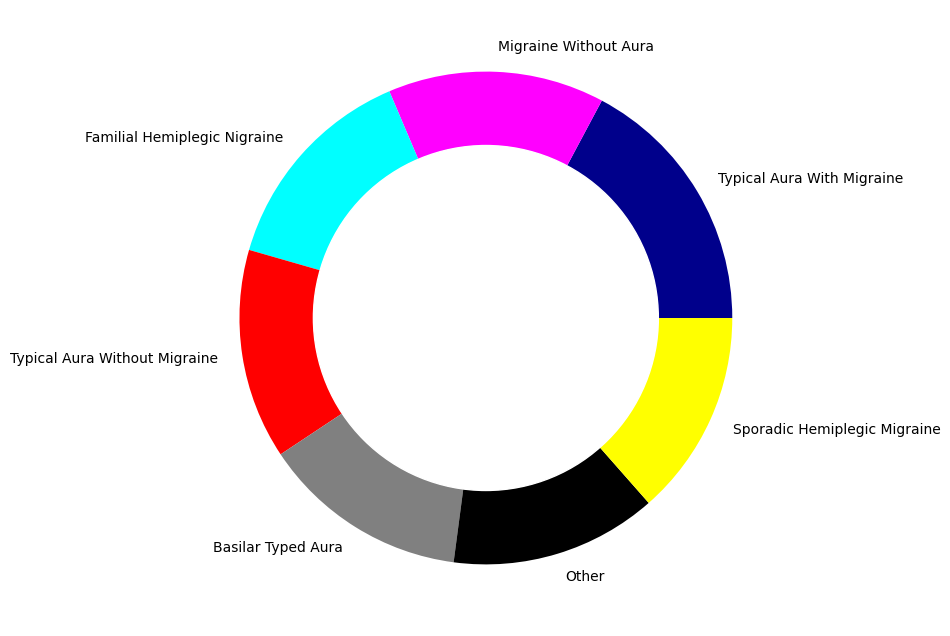

In [18]:
plt.figure(figsize = (10,8))
circle = plt.Circle((0,0),0.7,color='white')
plt.pie(migraine_ag.Type.value_counts(),
        labels = ['Typical Aura With Migraine', 'Migraine Without Aura', 'Familial Hemiplegic Nigraine',
        'Typical Aura Without Migraine', 'Basilar Typed Aura','Other', 'Sporadic Hemiplegic Migraine'], 
        colors=['darkblue', 'magenta', 'cyan','red', 'grey', 'black', 'yellow']) 
p = plt.gcf()
p.gca().add_artist(circle)

In [19]:
migraine_ag.groupby('Type').size()

Type
Basilar-type aura                204
Familial hemiplegic migraine     195
Migraine without aura            195
Other                            194
Sporadic hemiplegic migraine     203
Typical aura with migraine       247
Typical aura without migraine    198
dtype: int64

### Using SMOTE technique

In [20]:
from imblearn.over_sampling import SMOTE
# Instantiate the SMOTE object
smote = SMOTE(sampling_strategy={'Typical aura with migraine': 247, 'Migraine without aura': 200,
                                        'Familial hemiplegic migraine': 200,'Typical aura without migraine':200,
                                        'Basilar-type aura':200,'Other':200, 'Sporadic hemiplegic migraine':200 },
                                        random_state= 123)

# Assuming your data is in X and y
# Apply SMOTE to generate synthetic samples
X_resampled, y_resampled = smote.fit_resample(X, Y)

In [21]:
X_resampled.shape

(1447, 23)

In [22]:
y_resampled.shape

(1447,)

In [23]:
migraine_dg = pd.concat([X_resampled, y_resampled], axis = 1)
migraine_dg

,Age,Duration,Frequency,Location,Character,Intensity,Nausea,Vomit,Phonophobia,Photophobia,Visual,Sensory,Dysphasia,Dysarthria,Vertigo,Tinnitus,Hypoacusis,Diplopia,Defect,Ataxia,Conscience,Paresthesia,DPF,Type
0,30,1,5,1,1,2,1,0,1,1,1,2,0,0,0,0,0,0,0,0,0,0,0,Typical aura with migraine
1,50,3,5,1,1,3,1,1,1,1,2,1,0,0,1,0,0,0,0,0,0,0,0,Typical aura with migraine
2,53,2,1,1,1,2,1,1,1,1,2,0,0,0,0,0,0,0,0,0,0,0,0,Typical aura with migraine
3,45,3,5,1,1,3,1,0,1,1,2,2,0,0,1,0,0,0,0,0,0,0,0,Typical aura with migraine
4,53,1,1,1,1,2,1,0,1,1,4,0,0,0,0,0,0,0,0,0,0,0,1,Typical aura with migraine
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1442,32,1,4,0,0,0,1,0,1,1,3,0,0,0,0,0,0,0,0,0,0,0,0,Typical aura without migraine
1443,33,1,1,0,0,0,1,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,Typical aura without migraine
1444,37,1,3,0,0,0,1,0,1,1,3,2,0,0,0,0,0,0,0,0,0,0,0,Typical aura without migraine
1445,20,2,5,0,0,0,0,0,1,1,3,1,0,0,0,0,0,0,0,0,0,0,1,Typical aura without migraine


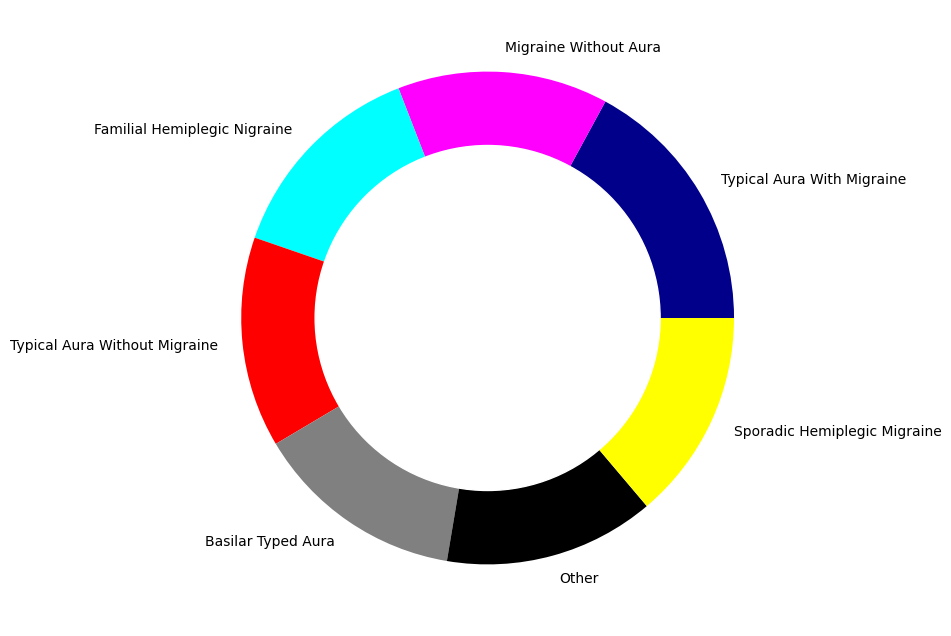

In [24]:
plt.figure(figsize = (10,8))
circle = plt.Circle((0,0),0.7,color='white')
plt.pie(migraine_dg.Type.value_counts(),
        labels = ['Typical Aura With Migraine', 'Migraine Without Aura', 'Familial Hemiplegic Nigraine',
        'Typical Aura Without Migraine', 'Basilar Typed Aura','Other', 'Sporadic Hemiplegic Migraine'], 
        colors=['darkblue', 'magenta', 'cyan','red', 'grey', 'black', 'yellow']) 
p = plt.gcf()
p.gca().add_artist(circle)

### Using resampling method

In [25]:
#lets take 7 different dataframe based on the their Type of migraine
data_1 = migraine[migraine['Type'] == 'Typical aura with migraine']
data_2 = migraine[migraine['Type'] == 'Migraine without aura']
data_3 = migraine[migraine['Type'] == 'Familial hemiplegic migraine']
data_4 = migraine[migraine['Type'] == 'Typical aura without migraine']
data_5 = migraine[migraine['Type'] == 'Basilar-type aura']
data_6 = migraine[migraine['Type'] == 'Other']
data_7 = migraine[migraine['Type'] == 'Sporadic hemiplegic migraine']

In [26]:
# applying resampling through sampling function in sklearn
from sklearn.utils import resample

# we will put 200 samples in each class
data_1_resample = resample(data_1, n_samples=200,
                           random_state=123, replace=True)
data_2_resample = resample(data_2, n_samples=200,
                           random_state=123, replace=True)
data_3_resample = resample(data_3, n_samples=200,
                           random_state=123, replace=True)
data_4_resample = resample(data_4, n_samples=200,
                           random_state=123, replace=True)
data_5_resample = resample(data_5, n_samples=200,
                           random_state=123, replace=True)
data_6_resample = resample(data_6, n_samples=200,
                           random_state=123, replace=True)
data_7_resample = resample(data_7, n_samples=200,
                           random_state=123, replace=True)

In [27]:
migraine_dg_resample = pd.concat([data_1, data_2_resample, data_3_resample, data_4_resample,
                          data_5_resample, data_6_resample, data_7_resample])

migraine_dg_resample.head()

,Age,Duration,Frequency,Location,Character,Intensity,Nausea,Vomit,Phonophobia,Photophobia,Visual,Sensory,Dysphasia,Dysarthria,Vertigo,Tinnitus,Hypoacusis,Diplopia,Defect,Ataxia,Conscience,Paresthesia,DPF,Type
0,30,1,5,1,1,2,1,0,1,1,1,2,0,0,0,0,0,0,0,0,0,0,0,Typical aura with migraine
1,50,3,5,1,1,3,1,1,1,1,2,1,0,0,1,0,0,0,0,0,0,0,0,Typical aura with migraine
2,53,2,1,1,1,2,1,1,1,1,2,0,0,0,0,0,0,0,0,0,0,0,0,Typical aura with migraine
3,45,3,5,1,1,3,1,0,1,1,2,2,0,0,1,0,0,0,0,0,0,0,0,Typical aura with migraine
4,53,1,1,1,1,2,1,0,1,1,4,0,0,0,0,0,0,0,0,0,0,0,1,Typical aura with migraine


In [28]:
migraine_dg_resample.shape

(1447, 24)

## Machine Learning Models

### SVM Model with SMOTE DG Techniques

In [29]:
from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

# Instantiate SVM classifier
svm_classifier = svm.SVC(kernel='linear', C=1, probability= True, decision_function_shape='ovr', random_state=42)

# Train the SVM classifier
svm_classifier.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = svm_classifier.predict(X_test)

# Evaluate the model
print("Classification Report:")
print(classification_report(y_test, y_pred))

print(f'Accuracy: {accuracy_score(y_test, y_pred)}')

Classification Report:
                               precision    recall  f1-score   support

            Basilar-type aura       0.80      0.67      0.73        30
 Familial hemiplegic migraine       0.88      0.90      0.89        42
        Migraine without aura       0.93      1.00      0.97        43
                        Other       1.00      0.98      0.99        50
 Sporadic hemiplegic migraine       0.86      0.84      0.85        44
   Typical aura with migraine       0.76      0.81      0.79        43
Typical aura without migraine       1.00      1.00      1.00        38

                     accuracy                           0.90       290
                    macro avg       0.89      0.89      0.89       290
                 weighted avg       0.90      0.90      0.90       290

Accuracy: 0.896551724137931


### SVM Model for resampling techniques

In [30]:
from sklearn import svm
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score

# Generate sample data
# X, y = make_classification(n_samples=1000, n_features=20, n_classes=7, n_clusters_per_class=1, random_state=42)

X = migraine_dg_resample.drop('Type', axis = 1)
y = migraine_dg_resample['Type']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Instantiate SVM classifier
svm_classifier = svm.SVC(kernel='linear', C=1, probability= True, decision_function_shape='ovr', random_state=42)

# Train the SVM classifier
svm_classifier.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = svm_classifier.predict(X_test)

# Evaluate the model
print("Classification Report:")
print(classification_report(y_test, y_pred))

print(f'Accuracy: {accuracy_score(y_test, y_pred)}')

Classification Report:
                               precision    recall  f1-score   support

            Basilar-type aura       0.98      1.00      0.99        48
 Familial hemiplegic migraine       0.85      1.00      0.92        33
        Migraine without aura       0.96      1.00      0.98        46
                        Other       1.00      0.96      0.98        49
 Sporadic hemiplegic migraine       0.81      0.97      0.88        31
   Typical aura with migraine       0.97      0.68      0.80        44
Typical aura without migraine       1.00      1.00      1.00        39

                     accuracy                           0.94       290
                    macro avg       0.94      0.94      0.94       290
                 weighted avg       0.95      0.94      0.94       290

Accuracy: 0.9413793103448276


### SVM Model using ADASYN 

In [31]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_adasyn, y_adasyn, test_size=0.2, random_state=42)

# Instantiate SVM classifier
svm_classifier = svm.SVC(kernel='linear', C=1, probability= True, decision_function_shape='ovr', random_state=42)

# Train the SVM classifier
svm_classifier.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = svm_classifier.predict(X_test)

# Evaluate the model
print("Classification Report:")
print(classification_report(y_test, y_pred))

print(f'Accuracy: {accuracy_score(y_test, y_pred)}')

Classification Report:
                               precision    recall  f1-score   support

            Basilar-type aura       0.81      0.79      0.80        33
 Familial hemiplegic migraine       0.94      0.78      0.85        37
        Migraine without aura       0.93      1.00      0.96        41
                        Other       1.00      1.00      1.00        44
 Sporadic hemiplegic migraine       0.86      0.92      0.89        48
   Typical aura with migraine       0.78      0.80      0.79        45
Typical aura without migraine       1.00      1.00      1.00        40

                     accuracy                           0.90       288
                    macro avg       0.90      0.90      0.90       288
                 weighted avg       0.90      0.90      0.90       288

Accuracy: 0.9027777777777778


### KNN model with SMOTE Technique

In [32]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

# Specify parameters
neighbors_range = range(1, 16)  # Range of number of neighbors from 1 to 15
weights = 'uniform'  # Weight function used in prediction ('uniform' for all points having equal weight)
metric = 'euclidean'  # Distance metric for evaluating the proximity of neighbors

# Train the KNN classifier with each value of k
for n_neighbors in neighbors_range:
    # Instantiate KNN classifier
    knn_classifier = KNeighborsClassifier(n_neighbors=n_neighbors, weights=weights, metric=metric)
    
    # Train the classifier
    knn_classifier.fit(X_train, y_train)
    
    # Make predictions on the testing data
    y_pred = knn_classifier.predict(X_test)
    
    # Evaluate the model
    print(f"Classification Report for k={n_neighbors}:")
    print(classification_report(y_test, y_pred))
    print(f'Accuracy: {accuracy_score(y_test, y_pred)}')
    print('********************************************')

Classification Report for k=1:
                               precision    recall  f1-score   support

            Basilar-type aura       0.85      0.97      0.91        30
 Familial hemiplegic migraine       0.87      0.95      0.91        42
        Migraine without aura       0.91      0.91      0.91        43
                        Other       0.98      1.00      0.99        50
 Sporadic hemiplegic migraine       0.93      0.95      0.94        44
   Typical aura with migraine       0.82      0.63      0.71        43
Typical aura without migraine       1.00      1.00      1.00        38

                     accuracy                           0.91       290
                    macro avg       0.91      0.92      0.91       290
                 weighted avg       0.91      0.91      0.91       290

Accuracy: 0.9137931034482759
********************************************
Classification Report for k=2:
                               precision    recall  f1-score   support

        

### KNN Model with Resampling Techniques

In [33]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

X = migraine_dg_resample.drop('Type', axis = 1)
y = migraine_dg_resample['Type']
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Specify parameters
neighbors_range = range(1, 16)  # Range of number of neighbors from 1 to 15
weights = 'uniform'  # Weight function used in prediction ('uniform' for all points having equal weight)
metric = 'euclidean'  # Distance metric for evaluating the proximity of neighbors

# Train the KNN classifier with each value of k
for n_neighbors in neighbors_range:
    # Instantiate KNN classifier
    knn_classifier = KNeighborsClassifier(n_neighbors=n_neighbors, weights=weights, metric=metric)
    
    # Train the classifier
    knn_classifier.fit(X_train, y_train)
    
    # Make predictions on the testing data
    y_pred = knn_classifier.predict(X_test)
    
    # Evaluate the model
    print(f"Classification Report for k={n_neighbors}:")
    print(classification_report(y_test, y_pred))
    print(f'Accuracy: {accuracy_score(y_test, y_pred)}')
    print('********************************************')

Classification Report for k=1:
                               precision    recall  f1-score   support

            Basilar-type aura       1.00      1.00      1.00        48
 Familial hemiplegic migraine       0.97      1.00      0.99        33
        Migraine without aura       0.95      0.91      0.93        46
                        Other       0.98      1.00      0.99        49
 Sporadic hemiplegic migraine       0.94      1.00      0.97        31
   Typical aura with migraine       0.90      0.86      0.88        44
Typical aura without migraine       1.00      1.00      1.00        39

                     accuracy                           0.97       290
                    macro avg       0.96      0.97      0.97       290
                 weighted avg       0.97      0.97      0.97       290

Accuracy: 0.9655172413793104
********************************************
Classification Report for k=2:
                               precision    recall  f1-score   support

        

### KNN Model using ADASYN

In [34]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_adasyn, y_adasyn, test_size=0.2, random_state=42)

# Specify parameters
neighbors_range = range(1, 16)  # Range of number of neighbors from 1 to 15
weights = 'uniform'  # Weight function used in prediction ('uniform' for all points having equal weight)
metric = 'euclidean'  # Distance metric for evaluating the proximity of neighbors

# Train the KNN classifier with each value of k
for n_neighbors in neighbors_range:
    # Instantiate KNN classifier
    knn_classifier = KNeighborsClassifier(n_neighbors=n_neighbors, weights=weights, metric=metric)
    
    # Train the classifier
    knn_classifier.fit(X_train, y_train)
    
    # Make predictions on the testing data
    y_pred = knn_classifier.predict(X_test)
    
    # Evaluate the model
    print(f"Classification Report for k={n_neighbors}:")
    print(classification_report(y_test, y_pred))
    print(f'Accuracy: {accuracy_score(y_test, y_pred)}')
    print('********************************************')

Classification Report for k=1:
                               precision    recall  f1-score   support

            Basilar-type aura       0.88      0.91      0.90        33
 Familial hemiplegic migraine       0.91      0.86      0.89        37
        Migraine without aura       0.83      0.98      0.90        41
                        Other       0.98      0.95      0.97        44
 Sporadic hemiplegic migraine       0.88      0.94      0.91        48
   Typical aura with migraine       0.78      0.64      0.71        45
Typical aura without migraine       1.00      1.00      1.00        40

                     accuracy                           0.90       288
                    macro avg       0.90      0.90      0.90       288
                 weighted avg       0.89      0.90      0.89       288

Accuracy: 0.8958333333333334
********************************************
Classification Report for k=2:
                               precision    recall  f1-score   support

        

### Random Forest Classifier with SMOTE Techniques


In [35]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import classification_report

# Generate sample data
# X, y = make_classification(n_samples=1000, n_features=20, n_classes=7, n_clusters_per_class=1, random_state=42)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

# Define parameter grid
param_grid = {
    'n_estimators': [50, 60, 70, 80, 90, 100],
    'max_depth': [10, 15, 20, 25]
}

# Instantiate Random Forest classifier
random_forest_classifier = RandomForestClassifier(random_state=42)

# Instantiate GridSearchCV
grid_search = GridSearchCV(random_forest_classifier, param_grid, cv=5, scoring='accuracy')

# Perform grid search
grid_search.fit(X_train, y_train)

# Get best parameters
best_params = grid_search.best_params_
print("Best Parameters:", best_params)

# Make predictions on the testing data using the best model
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

# Evaluate the best model
print("Classification Report:")
print(classification_report(y_test, y_pred))
print(f'Accuracy: {accuracy_score(y_test, y_pred)}')

Best Parameters: {'max_depth': 15, 'n_estimators': 60}
Classification Report:
                               precision    recall  f1-score   support

            Basilar-type aura       0.97      0.97      0.97        30
 Familial hemiplegic migraine       1.00      0.95      0.98        42
        Migraine without aura       1.00      1.00      1.00        43
                        Other       1.00      1.00      1.00        50
 Sporadic hemiplegic migraine       0.91      0.98      0.95        44
   Typical aura with migraine       0.93      0.91      0.92        43
Typical aura without migraine       1.00      1.00      1.00        38

                     accuracy                           0.97       290
                    macro avg       0.97      0.97      0.97       290
                 weighted avg       0.97      0.97      0.97       290

Accuracy: 0.9724137931034482


### Random Forest Classifier with resampling Techniques

In [36]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import classification_report

# Generate sample data
# X, y = make_classification(n_samples=1000, n_features=20, n_classes=7, n_clusters_per_class=1, random_state=42)
X = migraine_dg_resample.drop('Type', axis = 1)
y = migraine_dg_resample['Type']
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define parameter grid
param_grid = {
    'n_estimators': [50, 60, 70, 80, 90, 100],
    'max_depth': [10, 15, 20, 25]
}

# Instantiate Random Forest classifier
random_forest_classifier = RandomForestClassifier(random_state=42)

# Instantiate GridSearchCV
grid_search = GridSearchCV(random_forest_classifier, param_grid, cv=5, scoring='accuracy')

# Perform grid search
grid_search.fit(X_train, y_train)

# Get best parameters
best_params = grid_search.best_params_
print("Best Parameters:", best_params)

# Make predictions on the testing data using the best model
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

# Evaluate the best model
print("Classification Report:")
print(classification_report(y_test, y_pred))
print(f'Accuracy: {accuracy_score(y_test, y_pred)}')

Best Parameters: {'max_depth': 20, 'n_estimators': 100}
Classification Report:
                               precision    recall  f1-score   support

            Basilar-type aura       1.00      1.00      1.00        48
 Familial hemiplegic migraine       1.00      1.00      1.00        33
        Migraine without aura       1.00      1.00      1.00        46
                        Other       1.00      1.00      1.00        49
 Sporadic hemiplegic migraine       0.97      1.00      0.98        31
   Typical aura with migraine       1.00      0.98      0.99        44
Typical aura without migraine       1.00      1.00      1.00        39

                     accuracy                           1.00       290
                    macro avg       1.00      1.00      1.00       290
                 weighted avg       1.00      1.00      1.00       290

Accuracy: 0.996551724137931


### Random Forest using ADASYN

In [37]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_adasyn, y_adasyn, test_size=0.2, random_state=42)

# Define parameter grid
param_grid = {
    'n_estimators': [50, 60, 70, 80, 90, 100],
    'max_depth': [10, 15, 20, 25]
}

# Instantiate Random Forest classifier
random_forest_classifier = RandomForestClassifier(random_state=42)

# Instantiate GridSearchCV
grid_search = GridSearchCV(random_forest_classifier, param_grid, cv=5, scoring='accuracy')

# Perform grid search
grid_search.fit(X_train, y_train)

# Get best parameters
best_params = grid_search.best_params_
print("Best Parameters:", best_params)

# Make predictions on the testing data using the best model
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

# Evaluate the best model
print("Classification Report:")
print(classification_report(y_test, y_pred))
print(f'Accuracy: {accuracy_score(y_test, y_pred)}')

Best Parameters: {'max_depth': 15, 'n_estimators': 60}
Classification Report:
                               precision    recall  f1-score   support

            Basilar-type aura       0.94      0.91      0.92        33
 Familial hemiplegic migraine       1.00      0.97      0.99        37
        Migraine without aura       0.95      1.00      0.98        41
                        Other       1.00      1.00      1.00        44
 Sporadic hemiplegic migraine       0.90      0.96      0.93        48
   Typical aura with migraine       0.98      0.91      0.94        45
Typical aura without migraine       1.00      1.00      1.00        40

                     accuracy                           0.97       288
                    macro avg       0.97      0.96      0.97       288
                 weighted avg       0.97      0.97      0.97       288

Accuracy: 0.9652777777777778


### XGBoost with SMOTE Techniques

In [38]:
!pip install xgboost


In [39]:
import xgboost as xgb
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import classification_report
from sklearn.preprocessing import LabelEncoder


label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y_resampled)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_encoded, test_size=0.2, random_state=42)

# Define parameter grid
param_grid = {
    'max_depth': [5, 6, 7],
    'learning_rate': [0.01, 0.1],
    'n_estimators': [50, 100, 150]
}

# Instantiate XGBoost classifier
xgb_classifier = xgb.XGBClassifier(objective='multi:softmax', num_class=7, random_state=42)

# Instantiate GridSearchCV
grid_search = GridSearchCV(xgb_classifier, param_grid, cv=5, scoring='accuracy', verbose=1)

# Perform grid search
grid_search.fit(X_train, y_train)

# Get best parameters
best_params = grid_search.best_params_
print("Best Parameters:", best_params)

# Make predictions on the testing data using the best model
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

# Evaluate the best model
print("Classification Report:")
print(classification_report(y_test, y_pred))
print(f'Accuracy: {accuracy_score(y_test, y_pred)}')

Fitting 5 folds for each of 18 candidates, totalling 90 fits
Best Parameters: {'learning_rate': 0.1, 'max_depth': 6, 'n_estimators': 100}
Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.97      0.92        30
           1       1.00      0.93      0.96        42
           2       0.98      1.00      0.99        43
           3       1.00      1.00      1.00        50
           4       0.92      1.00      0.96        44
           5       0.89      0.79      0.84        43
           6       1.00      1.00      1.00        38

    accuracy                           0.96       290
   macro avg       0.95      0.96      0.95       290
weighted avg       0.96      0.96      0.95       290

Accuracy: 0.9551724137931035


### XGBoost with Resampling Technique

In [40]:
import xgboost as xgb
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import classification_report

# Generate sample data
# X, y = make_classification(n_samples=1000, n_features=20, n_classes=7, n_clusters_per_class=1, random_state=42)

X = migraine_dg_resample.drop('Type', axis = 1)
y = migraine_dg_resample['Type']
label_encoder = LabelEncoder()
y_encoded_x = label_encoder.fit_transform(y)
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded_x, test_size=0.2, random_state=42)

# Define parameter grid
param_grid = {
    'max_depth': [5, 6, 7],
    'learning_rate': [0.01, 0.1],
    'n_estimators': [100, 150, 200]
}

# Instantiate XGBoost classifier
xgb_classifier = xgb.XGBClassifier(objective='multi:softmax', num_class=7, random_state=42)

# Instantiate GridSearchCV
grid_search = GridSearchCV(xgb_classifier, param_grid, cv=5, scoring='accuracy', verbose=1)

# Perform grid search
grid_search.fit(X_train, y_train)

# Get best parameters
best_params = grid_search.best_params_
print("Best Parameters:", best_params)

# Make predictions on the testing data using the best model
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

# Evaluate the best model
print("Classification Report:")
print(classification_report(y_test, y_pred))
print(f'Accuracy: {accuracy_score(y_test, y_pred)}')

Fitting 5 folds for each of 18 candidates, totalling 90 fits
Best Parameters: {'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 150}
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        48
           1       1.00      1.00      1.00        33
           2       1.00      1.00      1.00        46
           3       1.00      1.00      1.00        49
           4       0.97      1.00      0.98        31
           5       1.00      0.98      0.99        44
           6       1.00      1.00      1.00        39

    accuracy                           1.00       290
   macro avg       1.00      1.00      1.00       290
weighted avg       1.00      1.00      1.00       290

Accuracy: 0.996551724137931


### XGBoost using ADASYN

In [41]:
label_encoder = LabelEncoder()
y_encoded_adasyn = label_encoder.fit_transform(y_adasyn)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_adasyn, y_encoded_adasyn, test_size=0.2, random_state=42)

# Define parameter grid
param_grid = {
    'max_depth': [5, 6, 7],
    'learning_rate': [0.01, 0.1],
    'n_estimators': [50, 100, 150]
}

# Instantiate XGBoost classifier
xgb_classifier = xgb.XGBClassifier(objective='multi:softmax', num_class=7, random_state=42)

# Instantiate GridSearchCV
grid_search = GridSearchCV(xgb_classifier, param_grid, cv=5, scoring='accuracy', verbose=1)

# Perform grid search
grid_search.fit(X_train, y_train)

# Get best parameters
best_params = grid_search.best_params_
print("Best Parameters:", best_params)

# Make predictions on the testing data using the best model
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

# Evaluate the best model
print("Classification Report:")
print(classification_report(y_test, y_pred))
print(f'Accuracy: {accuracy_score(y_test, y_pred)}')

Fitting 5 folds for each of 18 candidates, totalling 90 fits
Best Parameters: {'learning_rate': 0.1, 'max_depth': 6, 'n_estimators': 150}
Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.94      0.95        33
           1       1.00      0.95      0.97        37
           2       0.98      1.00      0.99        41
           3       1.00      1.00      1.00        44
           4       0.94      0.94      0.94        48
           5       0.89      0.93      0.91        45
           6       1.00      1.00      1.00        40

    accuracy                           0.97       288
   macro avg       0.97      0.97      0.97       288
weighted avg       0.97      0.97      0.97       288

Accuracy: 0.9652777777777778


### Deep Neural Network with SMOTE Technique using 512 

In [48]:
from tensorflow.keras.layers import Dense, Conv1D, MaxPooling1D, Activation, Dropout
from tensorflow.keras.models import Sequential
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.utils import plot_model

In [49]:
X = np.array(X_resampled)
encoder = LabelEncoder()
encoder.fit(y_resampled)
encoded_Y = encoder.transform(y_resampled)
labelled_Y = to_categorical(encoded_Y)

X_train, X_test, Y_train, Y_test = train_test_split(X,
                                                  labelled_Y,
                                                  test_size=0.2,
                                                  random_state=42)

def naural_natwork():
    model = Sequential()
    model.add(Dense(512, activation='relu', input_shape=(X.shape[1],)))
    model.add(Dense(256, activation='relu'))
    model.add(Dense(128, activation='relu'))
    model.add(Dense(7, activation='softmax'))

    return model

In [50]:
model = naural_natwork()

# compiling the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# setting a callback for controlling model's performance
callback = EarlyStopping(monitor='val_accuracy',
                                   mode='max', # don't minimize the accuracy!
                                   patience=10,
                                   restore_best_weights=True)


# fitting the model to training data
model.fit(X_train, Y_train,
          epochs=1000,
          validation_data=(X_test, Y_test), verbose=1)

Epoch 1/1000


c:\Users\Me\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


37/37 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - accuracy: 0.2130 - loss: 2.0426 - val_accuracy: 0.4586 - val_loss: 1.4958
Epoch 2/1000
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5437 - loss: 1.2893 - val_accuracy: 0.7897 - val_loss: 0.7410
Epoch 3/1000
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7829 - loss: 0.7590 - val_accuracy: 0.6966 - val_loss: 0.7317
Epoch 4/1000
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7620 - loss: 0.6272 - val_accuracy: 0.8034 - val_loss: 0.5803
Epoch 5/1000
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7798 - loss: 0.5939 - val_accuracy: 0.7759 - val_loss: 0.5079
Epoch 6/1000
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8589 - loss: 0.4353 - val_accuracy: 0.8517 - val_loss: 0.4267
Epoch 7/1000
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8585 - loss: 0.3931 - val_accuracy: 0.9034 - val_loss: 0.3165
Epoch 8/1000
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8745 - loss: 0.3443 - val_accuracy: 0.8483 - val_lo

In [ ]:
model.summary()

In [ ]:
hist = model.history.history
acc, val_acc = hist['accuracy'], hist['val_accuracy']
loss = hist['loss']
val_loss = hist['val_loss']

plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.ylim([0, 1])
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy (Deep Neural Network V1)')

print('')

plt.subplot(2, 1, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.ylim([0, 1.0])

plt.legend(loc='upper right')
plt.title('Training and Validation Loss(Deep Neural Network V2)')
plt.xlabel('epoch')
plt.show()

In [ ]:
# Evaluate the model on the test data
loss, accuracy = model.evaluate(X_test, Y_test, verbose=1)

print(f'Test Accuracy: {accuracy*100:.2f}%')


### Deep Neural Network with Resampling Technique using 512

In [ ]:
X_m = migraine_dg_resample.drop('Type', axis = 1)
y_m = migraine_dg_resample['Type']

X = np.array(X_m)
encoder = LabelEncoder()
encoder.fit(y_m)
encoded_Y = encoder.transform(y_resampled)
labelled_Y = to_categorical(encoded_Y)

X_train, X_test, Y_train, Y_test = train_test_split(X,
                                                  labelled_Y,
                                                  test_size=0.2,
                                                  random_state=42)

def naural_natwork():
    model = Sequential()
    model.add(Dense(512, activation='relu', input_shape=(X.shape[1],)))
    model.add(Dense(256, activation='relu'))
    model.add(Dense(128, activation='relu'))
    model.add(Dense(7, activation='softmax'))

    return model

In [ ]:
model = naural_natwork()

# compiling the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# setting a callback for controlling model's performance
callback = EarlyStopping(monitor='val_accuracy',
                                   mode='max', # don't minimize the accuracy!
                                   patience=10,
                                   restore_best_weights=True)


# fitting the model to training data
model.fit(X_train, Y_train,
          epochs=1000,
          validation_data=(X_test, Y_test), verbose=1)

In [ ]:
# Evaluate the model on the test data
loss, accuracy = model.evaluate(X_test, Y_test, verbose=1)

print(f'Test Accuracy: {accuracy*100:.2f}%')

### Deep Neural Network with SMOTE using 1024

In [ ]:
X = np.array(X_resampled)
encoder = LabelEncoder()
encoder.fit(y_resampled)
encoded_Y = encoder.transform(y_resampled)
labelled_Y = to_categorical(encoded_Y)

X_train, X_test, Y_train, Y_test = train_test_split(X,
                                                  labelled_Y,
                                                  test_size=0.2,
                                                  random_state=42)

def naural_natwork():
    model = Sequential()
    model.add(Dense(1024, activation='relu', input_shape=(X.shape[1],)))
    model.add(Dense(512, activation='relu'))
    model.add(Dense(256, activation='relu'))
    model.add(Dense(128, activation='relu'))
    model.add(Dense(64, activation='relu'))
    model.add(Dense(7, activation='softmax'))

    return model

In [ ]:
model = naural_natwork()

# compiling the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# setting a callback for controlling model's performance
callback = EarlyStopping(monitor='val_accuracy',
                                   mode='max', # don't minimize the accuracy!
                                   patience=10,
                                   restore_best_weights=True)


# fitting the model to training data
model.fit(X_train, Y_train,
          epochs=1000,
          validation_data=(X_test, Y_test), verbose=1)

In [ ]:
# Evaluate the model on the test data
loss, accuracy = model.evaluate(X_test, Y_test, verbose=1)

print(f'Test Accuracy: {accuracy*100:.2f}%')

### Deep Neural Network using ADASYN with 512

In [ ]:
X = np.array(X_adasyn)
encoder = LabelEncoder()
encoder.fit(y_adasyn)
encoded_Y = encoder.transform(y_adasyn)
labelled_Y = to_categorical(encoded_Y)

X_train, X_test, Y_train, Y_test = train_test_split(X,
                                                  labelled_Y,
                                                  test_size=0.2,
                                                  random_state=42)

def naural_natwork():
    model = Sequential()
    model.add(Dense(512, activation='relu', input_shape=(X.shape[1],)))
    model.add(Dense(256, activation='relu'))
    model.add(Dense(128, activation='relu'))
    model.add(Dense(7, activation='softmax'))

    return model

In [ ]:
model = naural_natwork()

# compiling the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# setting a callback for controlling model's performance
callback = EarlyStopping(monitor='val_accuracy',
                                   mode='max', # don't minimize the accuracy!
                                   patience=10,
                                   restore_best_weights=True)


# fitting the model to training data
model.fit(X_train, Y_train,
          epochs=1000,
          validation_data=(X_test, Y_test), verbose=1)

In [ ]:
model.summary()

In [ ]:
# Evaluate the model on the test data
loss, accuracy = model.evaluate(X_test, Y_test, verbose=1)

print(f'Test Accuracy: {accuracy*100:.2f}%')


# Trying 

In [60]:
from keras.models import Sequential
from keras.layers import Dense

def naural_natwork(input_shape):
    model = Sequential()
    model.add(Dense(512, activation='relu', input_shape=(input_shape,)))
    model.add(Dense(256, activation='relu'))
    model.add(Dense(128, activation='relu'))
    model.add(Dense(7, activation='softmax'))
    return model




from ann_visualizer.visualize import ann_viz

# Assuming X is your input data
input_shape = X.shape[1]
model = naural_natwork(input_shape)

# Visualize the model
ann_viz(model, view=True, filename="network.gv", title="My Neural Network")


c:\Users\Me\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


AttributeError: 'Dense' object has no attribute 'input_shape'